# Load all necessary moduls

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.optimize import*
%matplotlib inline

# Load the dataset that needed

In [2]:
df=pd.read_csv("test_set.txt",names=["X1","X2","Class"],delim_whitespace=True)
df.head()

,X1,X2,Class
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0


# Plot the data points

In [3]:
positive = df[df['Class'].isin([1])]
negative = df[df['Class'].isin([0])]

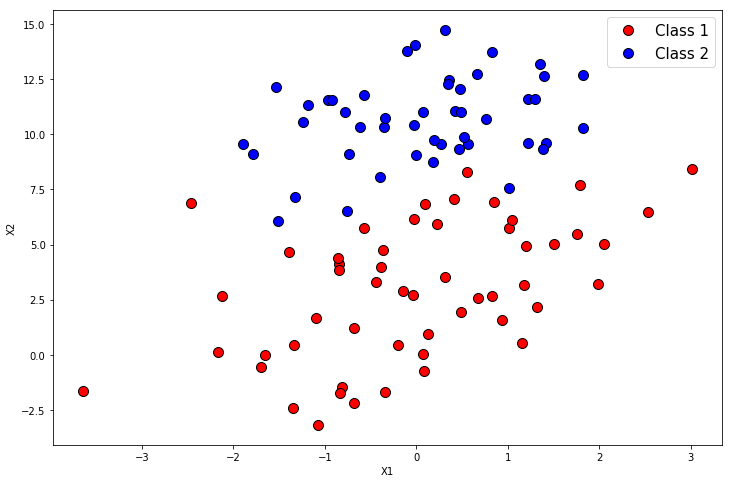

In [4]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(positive["X1"],positive["X2"],'ro',label='Class 1',markersize=10,markeredgecolor="black")
ax.plot(negative["X1"],negative["X2"],'bo',label='Class 2',markersize=10,markeredgecolor="black")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.legend(loc=0,prop={'size': 15})

# Define sigmoid function

In [5]:
def sigmoid(z):
    return 1/ (1+np.exp(-z))

# Define cost function

In [6]:
def costFunction(theta,X,Y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    first = np.multiply(-Y,np.log(sigmoid(X*theta.T)))
    second=np.multiply((1-Y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/len(X)

# Insert constant 1 to the front of the data

In [7]:
df.insert(0,"Ones",1)

# Split the data to X and Y

In [8]:
X=df.loc[:,["Ones","X1","X2"]]
Y=df.loc[:,["Class"]]

# Split the data to train set and test set

In [9]:
X=np.array(X)
Y=np.array(Y)
theta=np.zeros(3)

In [10]:
X.shape,Y.shape

((100, 3), (100, 1))

In [11]:
costFunction(theta,X,Y)

0.69314718055994529

# Define gradient function

In [12]:
def gradient(theta,X,Y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    parameters=int(theta.ravel().shape[1])
    grad=np.zeros(parameters)
    
    error=sigmoid(X*theta.T)-Y
    
    for i in range(parameters):
        term=np.multiply(error,X[:,i])
        grad[i]=np.sum(term)/len(X)
    return grad

In [13]:
gradient(theta,X,Y)

array([-0.03      ,  0.02355558,  1.71974059])

# Find the solution by convex optimization

In [14]:
result = minimize(costFunction, theta, args=(X,Y), options={'maxiter':100,"disp":True})
result

Optimization terminated successfully.
         Current function value: 0.093158
         Iterations: 25
         Function evaluations: 135
         Gradient evaluations: 27


      fun: 0.09315760569213698
 hess_inv: array([[ 1920.50906468,   128.0111327 ,  -256.57030215],
       [  128.0111327 ,    33.15634902,   -18.06544321],
       [ -256.57030215,   -18.06544321,    34.89025083]])
      jac: array([  4.04193997e-07,   1.78813934e-07,   3.09199095e-06])
  message: 'Optimization terminated successfully.'
     nfev: 135
      nit: 25
     njev: 27
   status: 0
  success: True
        x: array([ 14.75215836,   1.25358526,  -2.00267219])

In [15]:
print("The intercept is",result.x[0])
print("The coefficient is",result.x[1:])
print("The new cost is",costFunction(result.x,X,Y))

The intercept is 14.7521583587
The coefficient is [ 1.25358526 -2.00267219]
The new cost is 0.0931576056921


# Define predict function

In [16]:
def predict(theta,X):
    probability=sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [17]:
theta_min=np.matrix(result.x)
predictions=predict(theta_min,X)
correct=[1 if ((a==1 and b==1) or (a == 0 and b == 0)) else 0 for (a,b) in zip(predictions,Y)]
accuracy=(sum(map(int,correct))%len(correct))
print("Accuracy = {0}%".format(accuracy))

Accuracy = 95%


# Plot the decision boundary

Class with x1 value of -2 and x2 value of 4 has 61.62% to be class 1


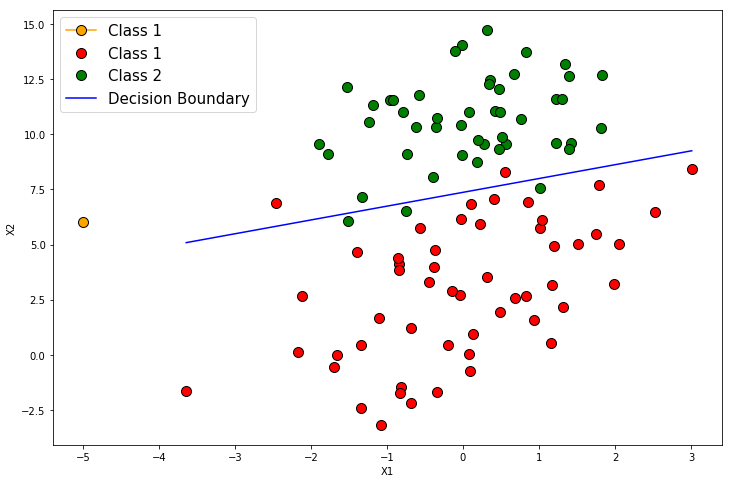

In [18]:
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./result.x[2])*(result.x[0] + result.x[1]*boundary_xs)
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(-5,6,color='orange',marker='o',label='Class 1',markersize=10,markeredgecolor="black")
ax.plot(positive["X1"],positive["X2"],'ro',label='Class 1',markersize=10,markeredgecolor="black")
ax.plot(negative["X1"],negative["X2"],'go',label='Class 2',markersize=10,markeredgecolor="black")
ax.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.legend(loc=0,prop={'size': 15})
temp=np.array([1,-5,4])
temp=np.reshape(temp,(1,3))
prob=sigmoid(temp*theta_min.T).tolist()[0][0]
print("Class with x1 value of -2 and x2 value of 4 has "+str(round(prob*100,2))+"% to be class 1")

# Predict with x1 value of -2 and x2 value of 4

In [19]:
temp=np.array([1,-2,5.5])
temp=np.reshape(temp,(1,3))
prob=sigmoid(temp*theta_min.T).tolist()[0][0]
print("Class with x1 value of -2 and x2 value of 4 has "+str(round(prob*100,2))+"% to be class 1")

Class with x1 value of -2 and x2 value of 4 has 77.39% to be class 1
